# Machine Learning 

In this notebook, we aim to train and test supervised learning models to find the best model for predicting whether or not a player's `Market Value` will increase based on his `Player Stats`.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
diff_df = pd.read_csv("diff_df_no_outliers.csv")
diff_df.head()

,Name,Position,Market_Value,Age,MP,Starts,Min,90s,Gls,Ast,...,CrdY,CrdR,PrgC,PrgP,PrgR,Gls (90),Ast (90),G+A (90),G-PK (90),G+A-PK (90)
0,Aaron Cresswell,Defender,-2000000.0,1.0,-16.0,-17.0,-1480.0,-16.4,-1.0,-2.0,...,-6.0,0.0,0.0,-34.0,41.0,-0.03,-0.03,-0.06,-0.03,-0.06
1,Aaron Lennon,Attack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,Aaron Mooy,Midfield,0.0,1.0,-7.0,-9.0,-737.0,-8.2,-1.0,-2.0,...,0.0,0.0,6.0,-85.0,17.0,0.00,-0.05,-0.06,-0.01,-0.06
3,Aaron Ramsey,Midfield,-5000000.0,1.0,4.0,-7.0,-515.0,-5.7,-3.0,-2.0,...,0.0,0.0,-14.0,-46.0,-28.0,-0.07,0.02,-0.05,-0.07,-0.05
4,Aarón Martín,Defender,0.0,1.0,1.0,1.0,63.0,0.7,0.0,3.0,...,-3.0,0.0,51.0,20.0,73.0,0.00,0.09,0.09,0.00,0.09


In [3]:
# generating a list of the predictors for our models
predictors = list(diff_df.columns)
predictors = predictors[2:]
predictors

['Market_Value',
 'Age',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'PrgC',
 'PrgP',
 'PrgR',
 'Gls (90)',
 'Ast (90)',
 'G+A (90)',
 'G-PK (90)',
 'G+A-PK (90)']

## Finding Correlation

Since there are alot of predictors available in our dataset, we decided to narrow down to the top 5 variables that have the highest correlation with `Market_Value` in order to yield the best accuracy results for our models. 

In [4]:
corr = diff_df[predictors].corr()['Market_Value']
# sort the values based on correlation coefficient 
corr = corr.abs().sort_values(ascending=False)

corr

Market_Value    1.000000
G+A             0.280890
PrgP            0.274467
MP              0.271589
PrgC            0.250278
G-PK            0.246541
90s             0.245498
Min             0.245493
Starts          0.240969
Ast             0.240161
PrgR            0.237851
Gls             0.230218
Age             0.208318
CrdY            0.122041
G-PK (90)       0.099012
Gls (90)        0.098623
PKatt           0.055339
CrdR            0.052795
PK              0.051977
G+A (90)        0.042898
G+A-PK (90)     0.041835
Ast (90)        0.008461
Name: Market_Value, dtype: float64

In [5]:
# create dataframe with the top5 correlation variables and the Market_Value
top_5 = corr[1:6].index.tolist()  
df = diff_df[['Market_Value']+top_5]
df

,Market_Value,G+A,PrgP,MP,PrgC,G-PK
0,-2000000.0,-3.0,-34.0,-16.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-3.0,-85.0,-7.0,6.0,-1.0
3,-5000000.0,-5.0,-46.0,4.0,-14.0,-3.0
4,0.0,3.0,20.0,1.0,51.0,0.0
...,...,...,...,...,...,...
1212,0.0,0.0,0.0,0.0,0.0,0.0
1213,0.0,0.0,0.0,0.0,0.0,0.0
1214,0.0,0.0,0.0,0.0,0.0,0.0
1215,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have obtained the dataset, we want to replace the `Market_Value column` to show whether the `Market_Value` of the player `Increased` or `Decreased/Same`.

In [6]:
# function to change Market_Value column 
def change(row):
    if row['Market_Value'] > 0:
        return 'Increase'
    else:
        return 'Decrease/Same'

In [7]:
df['Market_Value'] = df.apply(change, axis=1)
df

/Users/murong/opt/anaconda3/envs/condaEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Market_Value,G+A,PrgP,MP,PrgC,G-PK
0,Decrease/Same,-3.0,-34.0,-16.0,0.0,-1.0
1,Decrease/Same,0.0,0.0,0.0,0.0,0.0
2,Decrease/Same,-3.0,-85.0,-7.0,6.0,-1.0
3,Decrease/Same,-5.0,-46.0,4.0,-14.0,-3.0
4,Decrease/Same,3.0,20.0,1.0,51.0,0.0
...,...,...,...,...,...,...
1212,Decrease/Same,0.0,0.0,0.0,0.0,0.0
1213,Decrease/Same,0.0,0.0,0.0,0.0,0.0
1214,Decrease/Same,0.0,0.0,0.0,0.0,0.0
1215,Decrease/Same,0.0,0.0,0.0,0.0,0.0


## Accuracy Functions

Before we train and test our models, let us define some functions that help print and show the accuracy of our model. 

In [8]:
from sklearn.metrics import f1_score, roc_auc_score

def predictTrain(model, X_train, y_train): 
    # Predict the Response corresponding to Predictors
    y_train_pred = model.predict(X_train)

    # Calculate and print the Accuracy, F1 score and AUC
    accuracy = model.score(X_train, y_train)
    f1 = f1_score(y_train, y_train_pred)
    auc = roc_auc_score(y_train, y_train_pred)
    print("Train Set\n")
    print('Accuracy: {:.2f}'.format(accuracy))
    print('F1 score: {:.2f}'.format(f1))
    print('AUC: {:.2f}\n\n'.format(auc))


In [9]:
def predictTest(model, X_test, y_test): 
    # Predict the Response corresponding to Predictors
    y_test_pred = model.predict(X_test)

    # Calculate and print the Accuracy, F1 score and AUC
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    print("Test Set\n")
    print('Accuracy: {:.2f}'.format(accuracy))
    print('F1 score: {:.2f}'.format(f1))
    print('AUC: {:.2f}'.format(auc))


## 1. Decision Tree Classifier 

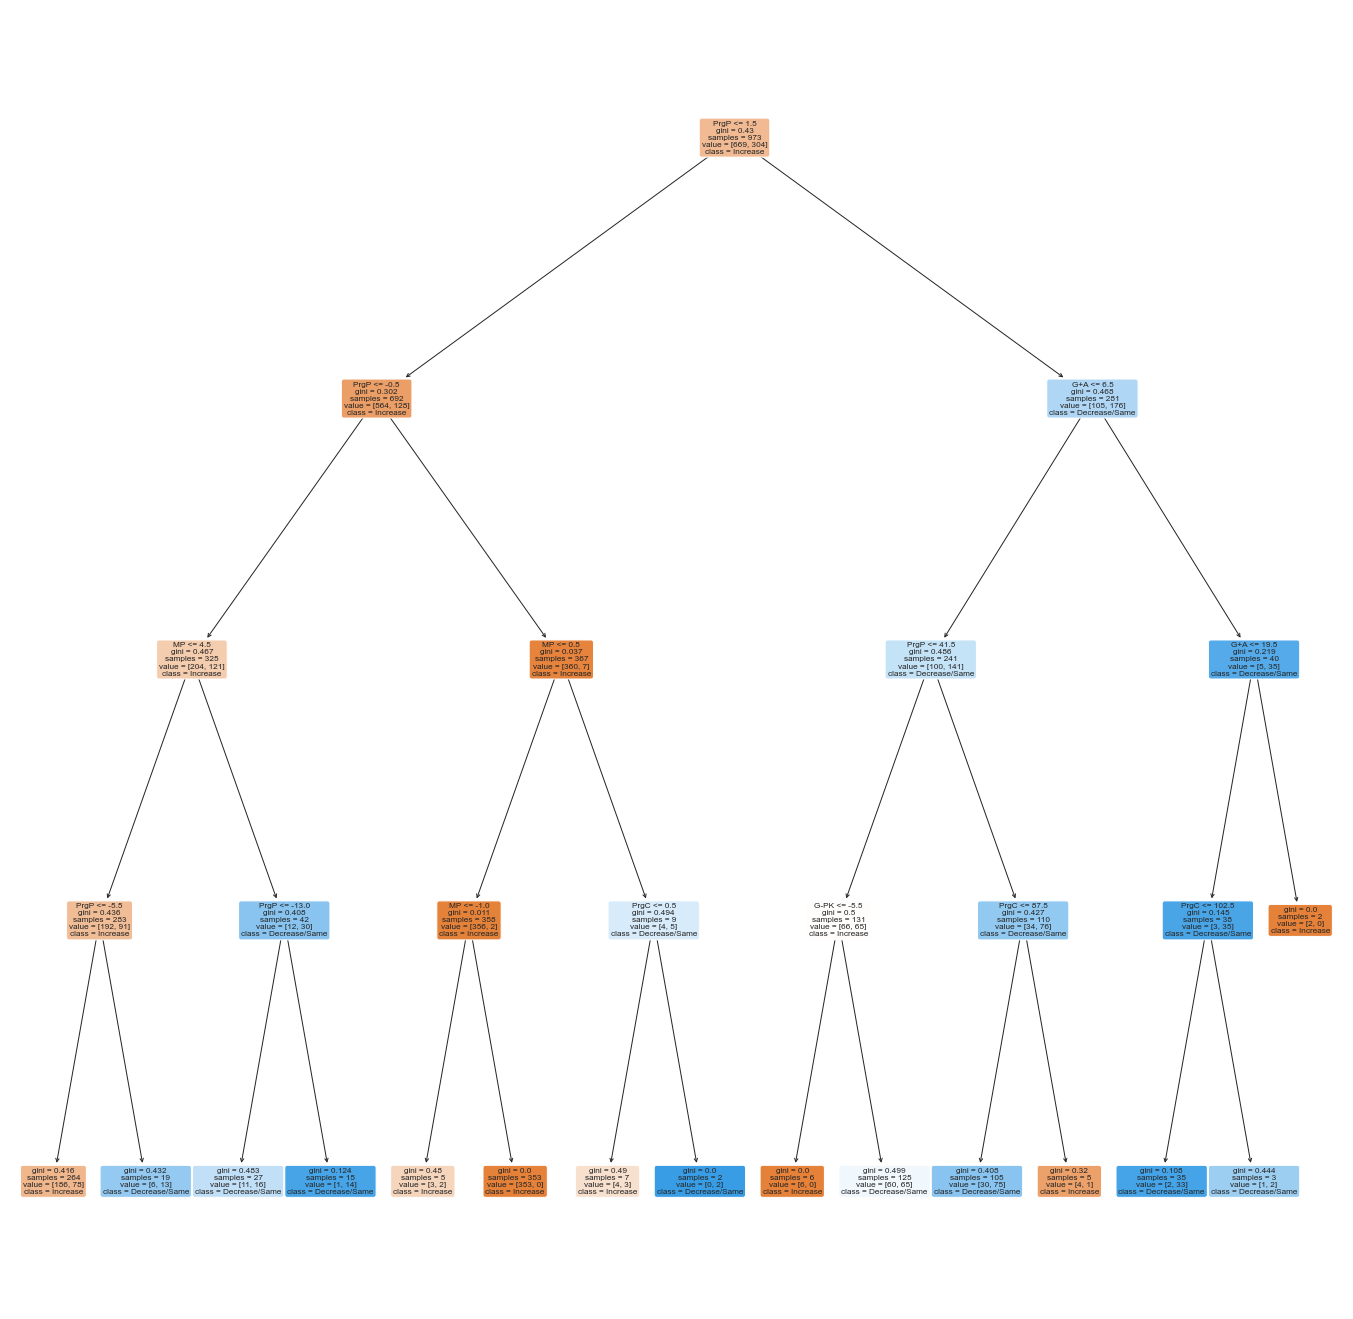

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Convert Market_Value to categorical variable
encoder = LabelEncoder()
y = encoder.fit_transform(df['Market_Value'])

# Split into features and target
X = df.drop(['Market_Value'], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

# Plot the trained Decision Tree
f = plt.figure(figsize=(24, 24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['Increase', 'Decrease/Same'])
plt.show()


In [11]:
predictTrain(dectree, X_train, y_train)
predictTest(dectree, X_test, y_test)

Train Set

Accuracy: 0.80
F1 score: 0.69
AUC: 0.78


Test Set

Accuracy: 0.76
F1 score: 0.63
AUC: 0.75


### Confusion Matrix 

We can also plot the confusion matrix to get a good understanding on the accuracy. 

Train Data
Accuracy  :	 0.7995889003083247

TPR Train :	 0.7236842105263158
TNR Train :	 0.8340807174887892

FPR Train :	 0.16591928251121077
FNR Train :	 0.27631578947368424


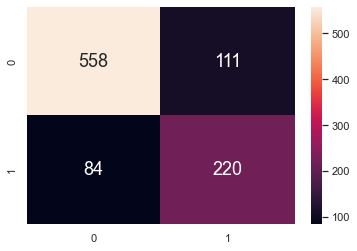

In [12]:
from sklearn.metrics import confusion_matrix
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.7622950819672131

TPR Test :	 0.7352941176470589
TNR Test :	 0.7727272727272727

FPR Test :	 0.22727272727272727
FNR Test :	 0.2647058823529412


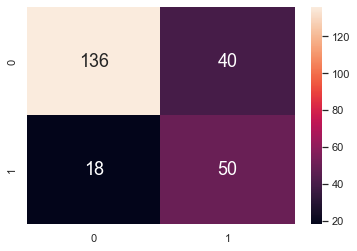

In [13]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

### Upsampling 

As we can see from the confusion matrix, there are alot more negative values than positive values. Hence, we attempt to upsample the positive data to improve accuracy of the model.

In [14]:
# Upsample Bad to match Good
from sklearn.utils import resample

value_decrease = df[df.Market_Value == 'Decrease/Same']
value_increase = df[df.Market_Value == 'Increase']

# Upsample the positive samples
value_increase_up = resample(value_increase, 
                        replace=True,                     # sample with replacement
                        n_samples=value_decrease.shape[0])    # to match number of negative
 
# Combine the two classes back after upsampling
value_up = pd.concat([value_decrease, value_increase_up])
 
# Check the ratio of the classes
value_up['Market_Value'].value_counts()



Decrease/Same    845
Increase         845
Name: Market_Value, dtype: int64

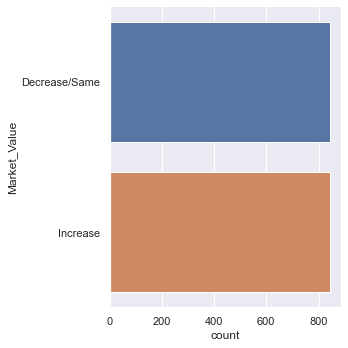

In [15]:
# we have the same number of positive and negative data now 
sb.catplot(y = 'Market_Value', data = value_up, kind = "count")
plt.show()

### Retry Decision Tree Classifier with new upsampled data 

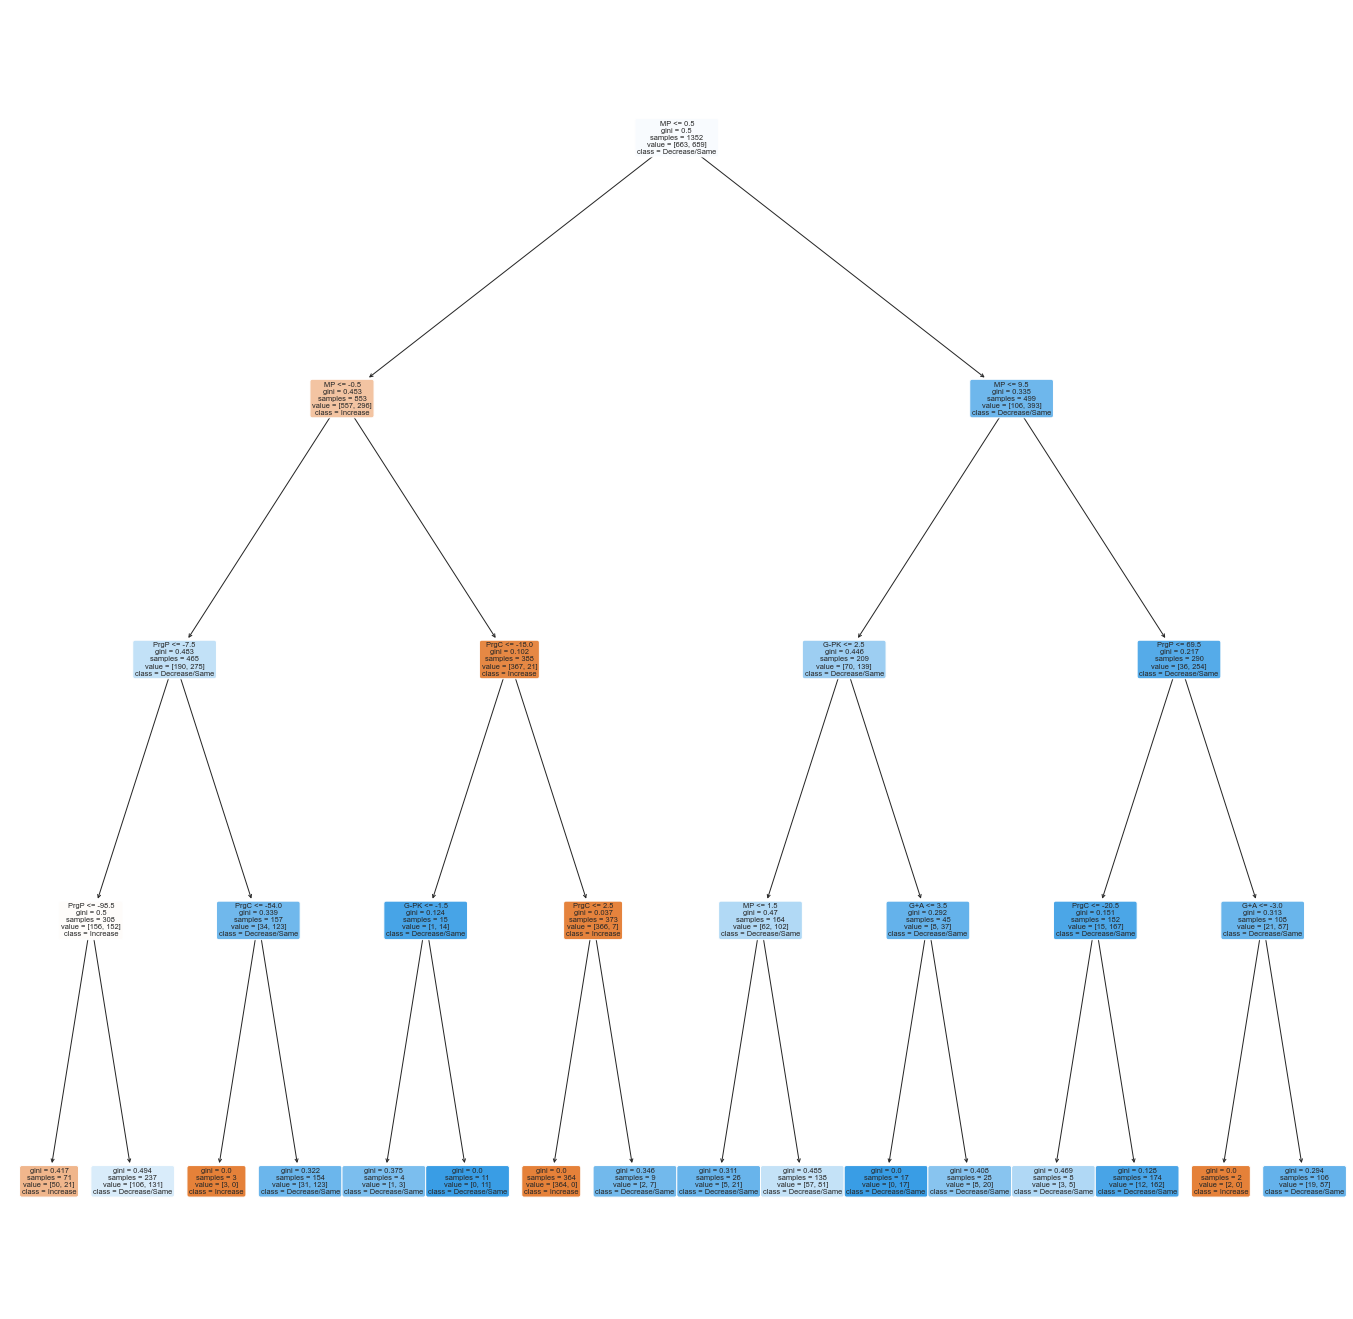

In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert Market_Value to categorical variable
encoder = LabelEncoder()
y = encoder.fit_transform(value_up['Market_Value'])

# Split into features and target
X = value_up.drop(['Market_Value'], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

# Plot the trained Decision Tree
f = plt.figure(figsize=(24, 24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['Increase', 'Decrease/Same'])
plt.show()


In [17]:
predictTrain(dectree, X_train, y_train)
predictTest(dectree, X_test, y_test)

Train Set

Accuracy: 0.80
F1 score: 0.83
AUC: 0.80


Test Set

Accuracy: 0.73
F1 score: 0.76
AUC: 0.74


We observe that there is not much difference between the Accuracy and the AUC before and after upsampling. However, there is some improvement to the F1 score. 

This is likely because the F1-score is the harmonic mean of precision and recall. It combines both metrics into a single score that balances precision and recall. (High precision indicates a low false positive rate and high recall indicates a low false negative rate) 

**We shall continue to use the upsampled dataset for the other models.**

## Random Forest Classifier 

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Convert Market_Value to categorical variable
encoder = LabelEncoder()
y = encoder.fit_transform(value_up['Market_Value'])
X = pd.DataFrame(value_up.drop('Market_Value', axis = 1))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [19]:
predictTrain(rfc, X_train, y_train)
predictTest(rfc, X_test, y_test)

Train Set

Accuracy: 0.82
F1 score: 0.85
AUC: 0.82


Test Set

Accuracy: 0.75
F1 score: 0.78
AUC: 0.77


There are very slight improvements in the accuracy of the train set but no improvements in the accuracy of the test set. 

Train Data
Accuracy  :	 0.8195266272189349

TPR Train :	 0.9738751814223512
TNR Train :	 0.6591251885369532

FPR Train :	 0.34087481146304677
FNR Train :	 0.026124818577648767


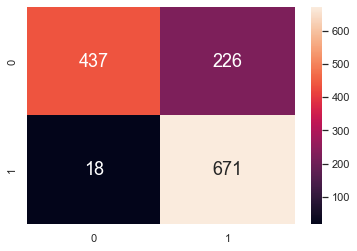

In [20]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rfc.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.7544378698224852

TPR Test :	 0.9423076923076923
TNR Test :	 0.5934065934065934

FPR Test :	 0.4065934065934066
FNR Test :	 0.057692307692307696


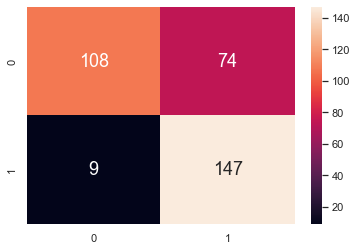

In [21]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rfc.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

### Cross Validation to find the optimal Hyper-Parameters 

Since there is minimal improvement, it might be due to the tuning of the hyper parameters in our random forest model. We will now try to use cross validation to find the optimal hyper-parameters for our model.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Convert Market_Value to categorical variable
encoder = LabelEncoder()
y = encoder.fit_transform(value_up['Market_Value'])
X = pd.DataFrame(value_up.drop('Market_Value', axis = 1))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.ravel())


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [24]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

RandomForestClassifier(max_depth=10, n_estimators=800)


**Using the best Random Forest Classifier found through GridSearchCv** 

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Convert Market_Value to categorical variable
encoder = LabelEncoder()
y = encoder.fit_transform(value_up['Market_Value'])
X = pd.DataFrame(value_up.drop('Market_Value', axis = 1))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [26]:
predictTrain(rfc, X_train, y_train)
predictTest(rfc, X_test, y_test)

Train Set

Accuracy: 0.97
F1 score: 0.98
AUC: 0.97


Test Set

Accuracy: 0.80
F1 score: 0.82
AUC: 0.82


There is a noticeable increase in the scores after using `cross validation` through `GridSearchCV` and these are some reasons that we think may have caused this: 

1. *Reduced Overfitting*:
Cross-validation helps to reduce overfitting of the model by evaluating the performance of the model on different subsets of the training data. This prevents the model from becoming too specialized to the training data and not generalizing well to new data.


2. *Optimized Hyperparameters*: 
Cross-validation allows you to optimize the hyperparameters of your model to improve its accuracy. By performing a search over a grid of hyperparameters, you can identify the combination of hyperparameters that give the best performance.

## Keras Neural Network

In [29]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# Encode the target variable using a LabelEncoder
le = LabelEncoder()
value_up['Market_Value_Encoded'] = le.fit_transform(value_up['Market_Value'])

# Split into features and target
X = value_up.drop(['Market_Value', 'Market_Value_Encoded' ], axis=1)
y = value_up['Market_Value_Encoded']


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}'.format(accuracy))

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Compute the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')
print('F1 score: {:.2f}'.format(f1score))

# Compute the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.2f}'.format(auc))


Train on 1352 samples, validate on 338 samples
Epoch 1/100
1352/1352 [==============================] - 1s 611us/sample - loss: 0.7670 - accuracy: 0.6043 - val_loss: 0.2680 - val_accuracy: 0.6538
Epoch 2/100
1352/1352 [==============================] - 0s 55us/sample - loss: 0.2573 - accuracy: 0.6472 - val_loss: 0.2155 - val_accuracy: 0.6746
Epoch 3/100
1352/1352 [==============================] - 0s 53us/sample - loss: 0.2128 - accuracy: 0.6879 - val_loss: 0.2031 - val_accuracy: 0.6923
Epoch 4/100
1352/1352 [==============================] - 0s 53us/sample - loss: 0.1902 - accuracy: 0.6997 - val_loss: 0.1924 - val_accuracy: 0.7367
Epoch 5/100
1352/1352 [==============================] - 0s 54us/sample - loss: 0.1820 - accuracy: 0.7367 - val_loss: 0.2031 - val_accuracy: 0.6953
Epoch 6/100
1352/1352 [==============================] - 0s 54us/sample - loss: 0.1730 - accuracy: 0.7359 - val_loss: 0.1856 - val_accuracy: 0.7130
Epoch 7/100
1352/1352 [==============================] - 0s 54us

Epoch 56/100
1352/1352 [==============================] - 0s 53us/sample - loss: 0.1020 - accuracy: 0.8661 - val_loss: 0.1683 - val_accuracy: 0.7811
Epoch 57/100
1352/1352 [==============================] - 0s 53us/sample - loss: 0.0987 - accuracy: 0.8683 - val_loss: 0.1708 - val_accuracy: 0.7929
Epoch 58/100
1352/1352 [==============================] - 0s 52us/sample - loss: 0.0980 - accuracy: 0.8609 - val_loss: 0.1734 - val_accuracy: 0.7751
Epoch 59/100
1352/1352 [==============================] - 0s 53us/sample - loss: 0.1016 - accuracy: 0.8595 - val_loss: 0.1717 - val_accuracy: 0.7751
Epoch 60/100
1352/1352 [==============================] - 0s 54us/sample - loss: 0.0955 - accuracy: 0.8646 - val_loss: 0.1653 - val_accuracy: 0.7929
Epoch 61/100
1352/1352 [==============================] - 0s 53us/sample - loss: 0.0973 - accuracy: 0.8639 - val_loss: 0.1680 - val_accuracy: 0.7959
Epoch 62/100
1352/1352 [==============================] - 0s 52us/sample - loss: 0.0964 - accuracy: 0.8676

Accuracy: 0.79
F1 score: 0.79
AUC: 0.80


## Support Vector Machine with GridSearchCV

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV


# Encode the target variable using a LabelEncoder
le = LabelEncoder()
value_up['Market_Value_Encoded'] = le.fit_transform(value_up['Market_Value'])

# Split into features and target
X = value_up.drop(['Market_Value', 'Market_Value_Encoded' ], axis=1)
y = value_up['Market_Value_Encoded']


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the SVM model
svm = SVC()

# define the hyperparameters to search over
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_svm = grid_search.best_estimator_

# make predictions on the test set
y_pred = best_svm.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy: {:.2f}'.format(accuracy))
print('F1 score: {:.2f}'.format(f1))
print('AUC: {:.2f}'.format(auc))



Accuracy: 0.73
F1 score: 0.74
AUC: 0.74


Scores are much lower than expected especially due to the fact that we also used `GridSearchCV` with the SVM model to find the best hyper-parameters to use. We suspect that this could be due to the lack of features we used during the training. 

SVM models are sensitive to the choice of features used to train them. If your feature set is not well-suited to the problem you are trying to solve, the model may struggle to perform well. Although we selected features with the highest correlation, it's possible that these features are not sufficient to accurately predict the target variable. In other words, there may be other important features that were not included in the model.

## Comparing all 4 models 

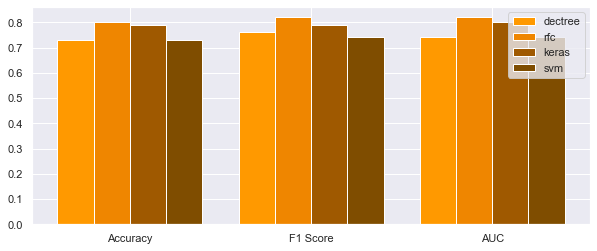

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the scores for each model
dectree_scores = [0.73, 0.76, 0.74]
rfc_scores = [0.80, 0.82, 0.82]
keras_scores = [0.79, 0.79, 0.80]
svm_scores = [0.73, 0.74, 0.74]

# Define the labels for the x-axis
labels = ['Accuracy', 'F1 Score', 'AUC']

# Combine the scores for all models into a list of lists
all_scores = [dectree_scores, rfc_scores, keras_scores, svm_scores]

# Set the bar width
width = 0.2

# Calculate the x positions for the bars
x_pos = np.arange(len(labels))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 4))

# Define shades of orange for the bars
colors = ['#FF9900', '#EF8600', '#9F5900', '#7F4D00']

# Loop through each model's scores and plot a group of bars for each model
for i, model_scores in enumerate(all_scores):
    # Calculate the x positions for the bars in the current group
    model_x_pos = x_pos + (i - 1.5) * width
    
    # Plot the bars
    ax.bar(model_x_pos, model_scores, width=width, color=colors[i], label=['dectree', 'rfc', 'keras', 'svm'][i])

# Add a legend and axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


### Evaluation 

As observed, the Random Forest Classifier together with GridSearchCV had the highest scores out of all the models. While there are many factors that could have affected these results including the size and complexity of the dataset, the nature of the features, and the distribution of the classes, we think that RFC performed the best because: 

1. Random Forest provides a measure of feature importance, which can help identify the most important variables for making predictions. 

2. Random Forest aggregates the predictions of many trees, random forest can reduce the variance of the model, overfitting and improve its accuracy.